In [3]:
import pandas as pd
import numpy as np

In [136]:
cfdata = pd.read_csv('./data/cfdata.csv')

date = pd.to_datetime(cfdata['DCBYMD'],format='%Y-%m-%d')
opdate = pd.to_datetime(cfdata['APVPERMYMD'],format='%Y-%m-%d')
cfdata['DCBYMD'] = date
cfdata['APVPERMYMD'] = opdate

cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   24541 non-null  int64         
 1   APVPERMYMD   24541 non-null  datetime64[ns]
 2   TRDSTATEGBN  24541 non-null  int64         
 3   TRDSTATENM   24541 non-null  object        
 4   DCBYMD       8624 non-null   datetime64[ns]
 5   SITEAREA     23486 non-null  object        
 6   RDNWHLADDR   24541 non-null  object        
 7   BPLCNM       24541 non-null  object        
 8   X            24541 non-null  float64       
 9   Y            24541 non-null  float64       
 10  region       24541 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 2.1+ MB


In [137]:
cfdata = cfdata.drop(['Unnamed: 0'],axis = 1)

In [138]:
cfdata = cfdata.dropna(axis=0,subset=['SITEAREA'])
cfdata = cfdata.reset_index(drop='Ture')
cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   APVPERMYMD   23486 non-null  datetime64[ns]
 1   TRDSTATEGBN  23486 non-null  int64         
 2   TRDSTATENM   23486 non-null  object        
 3   DCBYMD       8344 non-null   datetime64[ns]
 4   SITEAREA     23486 non-null  object        
 5   RDNWHLADDR   23486 non-null  object        
 6   BPLCNM       23486 non-null  object        
 7   X            23486 non-null  float64       
 8   Y            23486 non-null  float64       
 9   region       23486 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [139]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [140]:
for i in range(len(cfdata['SITEAREA'])):
    cfdata['SITEAREA'][i] = locale.atof(cfdata['SITEAREA'][i])

<ipython-input-140-e1dcb61a17ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfdata['SITEAREA'][i] = locale.atof(cfdata['SITEAREA'][i])


In [180]:
cfdata.SITEAREA

0         22.53
1            22
2         74.21
3        337.19
4            30
          ...  
23481      98.1
23482        50
23483     142.5
23484        62
23485     66.84
Name: SITEAREA, Length: 23486, dtype: object

In [179]:
print(len(cfdata.loc[(cfdata.SITEAREA <= 33)]))
print(len(cfdata.loc[(cfdata.SITEAREA > 33) & (cfdata.SITEAREA < 100)]))
print(len(cfdata.loc[(cfdata.SITEAREA >= 100)]))

9334
10270
3882


In [181]:
len(cfdata.loc[(cfdata.DCBYMD.dt.year == 2020) & (cfdata.DCBYMD.dt.month == 12) & (cfdata.SITEAREA <= 33)])

126

In [185]:
area = pd.DataFrame({'연도':[],'월':[],'구':[],'폐업수':[],'영업수':[],'넓이':[]})

reg_list=[]    
year_list=[]
month_list=[]
closed_list=[]
open_list=[]
area_list=[]

reg=['용산구', '금천구', '서초구', '영등포구', '동대문구', '중구', '강남구', '관악구', '송파구','성동구', '광진구', '도봉구', '양천구', '강서구', '강동구', '중랑구', '구로구', '동작구','서대문구', '은평구', '종로구', '마포구', '강북구', '성북구', '노원구']


for i in range(len(reg)):

    reg_cfdata = cfdata.loc[cfdata.region == reg[i],:]    #구별 cfdata
    
    for k in range(0,4):
        year = 2017
        year += k
        
        year_reg = reg_cfdata.loc[reg_cfdata.DCBYMD.dt.year == year]  #연도별 reg_cfdata

        count_reg_cfdata = len(reg_cfdata)  #reg[i]구 year년 영업/폐업 데이터

        for j in range(1,13) :
            
            a33 = year_reg.loc[(year_reg.DCBYMD.dt.year == year) & (year_reg.DCBYMD.dt.month == j) & (cfdata.SITEAREA <= 33)]  #year년 j월 구별 폐업 데이터
            a3410 = year_reg.loc[(year_reg.DCBYMD.dt.year == year) & (year_reg.DCBYMD.dt.month == j) & (cfdata.SITEAREA > 33) & (cfdata.SITEAREA < 100)]
            a100 = year_reg.loc[(year_reg.DCBYMD.dt.year == year) & (year_reg.DCBYMD.dt.month == j) & (cfdata.SITEAREA >= 100)]
            
            closed_list.append(len(a33))  #폐업수
            closed_list.append(len(a3410))
            closed_list.append(len(a100))
            
            opendata = count_reg_cfdata - len(a33)  #영업수
            open_list.append(opendata)
            
            opendata = count_reg_cfdata - len(a3410)  #영업수
            open_list.append(opendata)
            
            opendata = count_reg_cfdata - len(a100)  #영업수
            open_list.append(opendata)
            
            area_list.append('~33')
            area_list.append('34~100')
            area_list.append('100~')
            
            for k in range(3):
                reg_list.append(reg[i])
                year_list.append(year)
                month_list.append(j)

area['연도'] = year_list
area['월'] = month_list
area['구'] = reg_list
area['폐업수'] = closed_list
area['영업수'] = open_list
area['넓이'] = area_list

In [1]:
area.loc[(area['구'] == '동작구') & (area['연도'] == 2020)]

NameError: name 'area' is not defined

In [189]:
area.to_csv('./data/area_df.csv',encoding='utf-8')

In [4]:
area = pd.read_csv('./data/area_df.csv')

In [6]:
dj = area.loc[(area['구'] == '동작구') & (area['연도'] == 2020)]

<AxesSubplot:>

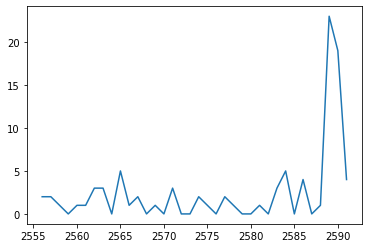

In [10]:
dj['폐업수'].plot()